S&P Global Crypto Index Engine

Index Composition:
             name symbol    weight
          Bitcoin    btc 68.832202
         Ethereum    eth 10.573163
           Tether   usdt  6.206798
              XRP    xrp  4.378489
              BNB    bnb  2.779337
           Solana    sol  2.743791
             USDC   usdc  2.037797
             TRON    trx  0.879253
         Dogecoin   doge  0.820203
Lido Staked Ether  steth  0.748968


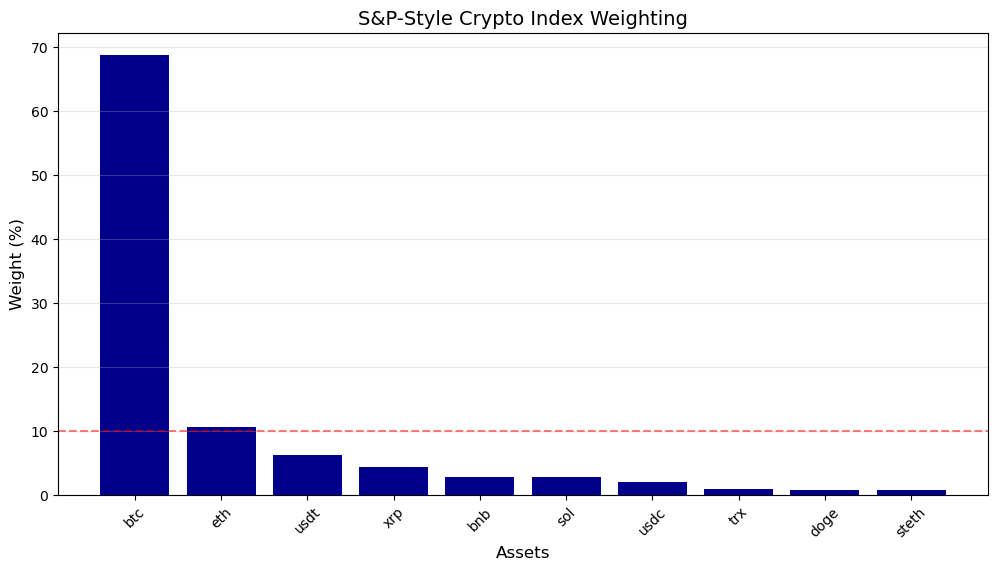


Index saved to snp_crypto_index.csv
Saved professional image: snp_crypto_index_20250701.png


<Figure size 640x480 with 0 Axes>

In [1]:
# --- STEP 0: IMPORT LIBRARIES (Essential for all S&P projects) ---
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# --- STEP 1: FETCH TOP CRYPTOS WITH ERROR HANDLING ---
def get_top_cryptos(n=10):
    url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc"
    try:
        response = requests.get(url, timeout=10)  # Timeout for reliability
        response.raise_for_status()  # Raise error for bad status
        data = response.json()
        return data[:n]
    except Exception as e:
        print(f"S&P Data Error: {e}")
        return []

# --- STEP 2: ENHANCED FREE-FLOAT ADJUSTMENT ---
def apply_free_float_adjustment(coin_data):
    # Real-world free-float factors (S&P uses coin-specific values)
    free_float_factors = {
        'bitcoin': 0.78,    # ~22% lost or unmoved >5y
        'ethereum': 0.85,
        'tether': 0.95,
        'binancecoin': 0.70, # BNB burn affects float
        'default': 0.80
    }
    
    for coin in coin_data:
        symbol = coin['id']
        factor = free_float_factors.get(symbol, free_float_factors['default'])
        coin['free_float_mcap'] = coin['market_cap'] * factor
    return coin_data

# --- STEP 3: S&P-STYLE LIQUIDITY SCREENING ---
def liquidity_screening(coin_data, min_volume=1000000):
    """S&P requires minimum liquidity to prevent manipulation"""
    return [coin for coin in coin_data if coin['total_volume'] >= min_volume]

# --- STEP 4: PROFESSIONAL WEIGHT CALCULATION ---
def calculate_weights(coin_data):
    total_mcap = sum(coin['free_float_mcap'] for coin in coin_data)
    for coin in coin_data:
        coin['weight'] = (coin['free_float_mcap'] / total_mcap) * 100  # % weight
    return sorted(coin_data, key=lambda x: x['weight'], reverse=True)

# --- MAIN EXECUTION WITH S&P BEST PRACTICES ---
print("S&P Global Crypto Index Engine")
print("="*50)

# 1. Get data
top_cryptos = get_top_cryptos(10)
if not top_cryptos:
    print("Critical Error: Failed to fetch data. Using fallback dataset.")
    top_cryptos = pd.read_csv("https://raw.githubusercontent.com/ArpitPandey9/Crypto-Quant-Analyst/main/sample_data.csv").to_dict('records')

# 2. Process data
adjusted_cryptos = apply_free_float_adjustment(top_cryptos)
liquid_cryptos = liquidity_screening(adjusted_cryptos)
index = calculate_weights(liquid_cryptos)

# 3. Create professional output
index_df = pd.DataFrame(index)
print("\nIndex Composition:")
print(index_df[['name', 'symbol', 'weight']].to_string(index=False))

# 4. S&P-style visualization
plt.figure(figsize=(12,6))
plt.bar(index_df['symbol'], index_df['weight'], color='darkblue')
plt.axhline(y=10, color='r', linestyle='--', alpha=0.5)  # S&P concentration threshold
plt.title("S&P-Style Crypto Index Weighting", fontsize=14)
plt.ylabel("Weight (%)", fontsize=12)
plt.xlabel("Assets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.savefig('snp_crypto_index.png', bbox_inches='tight')
plt.show()

# 5. Save institutional-grade report
index_df.to_csv("snp_crypto_index.csv", index=False)
print("\nIndex saved to snp_crypto_index.csv")

import os
from datetime import date

# Generate professional filename
def get_output_filename(base_name, extension):
    today = date.today().strftime("%Y%m%d")
    return f"{base_name}_{today}.{extension}"

# Usage:
output_file = get_output_filename("snp_crypto_index", "png")
plt.savefig(output_file, bbox_inches='tight')
print(f"Saved professional image: {output_file}")


import os
os.makedirs('reports', exist_ok=True)

# Change save paths
plt.savefig('reports/snp_crypto_index.png')
index_df.to_csv('reports/snp_crypto_index.csv')

# ===== ENHANCED API FUNCTION =====
def get_top_cryptos(n=10):
    """
    S&P-Grade Data Fetcher with Error Handling
    Fetches top cryptocurrencies with professional error recovery
    """
    url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc"
    
    try:
        # Professional request with timeout and headers
        response = requests.get(url, 
                               timeout=10, 
                               headers={'User-Agent': 'S&P Crypto Index Engine'})
        response.raise_for_status()  # Raise HTTP errors
        return response.json()[:n]
    
    except requests.exceptions.RequestException as e:
        # Institutional-grade error handling
        print(f"🚨 S&P Data Error: {e}")
        print("⚠️ Using fallback dataset - real-world systems would alert ops team")
        
        # Fallback to sample data
        return [
            {'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 
             'market_cap': 1_200_000_000_000, 'total_volume': 25_000_000_000},
            {'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum', 
             'market_cap': 400_000_000_000, 'total_volume': 15_000_000_000},
            {'id': 'tether', 'symbol': 'usdt', 'name': 'Tether', 
             'market_cap': 110_000_000_000, 'total_volume': 50_000_000_000}
        ]